<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Данные" data-toc-modified-id="Данные-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Данные</a></span><ul class="toc-item"><li><span><a href="#Скачивание" data-toc-modified-id="Скачивание-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Скачивание</a></span></li><li><span><a href="#Загрузка" data-toc-modified-id="Загрузка-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка</a></span></li></ul></li><li><span><a href="#Визуализация-предварительная" data-toc-modified-id="Визуализация-предварительная-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Визуализация предварительная</a></span></li><li><span><a href="#Сравнение" data-toc-modified-id="Сравнение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Сравнение</a></span></li><li><span><a href="#Обозначения" data-toc-modified-id="Обозначения-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обозначения</a></span><ul class="toc-item"><li><span><a href="#Для-ориентирования:" data-toc-modified-id="Для-ориентирования:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Для ориентирования:</a></span></li></ul></li><li><span><a href="#Source-of-data:-Our-World-in-Data" data-toc-modified-id="Source-of-data:-Our-World-in-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Source of data: Our World in Data</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy  as np
from IPython.display import display, HTML, Markdown
import ipywidgets as widgets
from ipywidgets.embed import embed_minimal_html, dependency_state
from matplotlib import pyplot as plt
import seaborn as sns
import humanize
import gettext
from babel import Locale
import imgkit
import warnings

%load_ext autoreload
%autoreload 2


# Данные

## Скачивание

Для скачивания используется команда [curl](https://ru.wikipedia.org/wiki/CURL) или [wget](https://ru.wikipedia.org/wiki/Wget)

Сайт:  
https://ourworldindata.org/grapher/excess-mortality-raw-death-count?tab=table&stackMode=absolute&country=~SWE&region=World

Описание данных и репозиторий:  
https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality

Данные о населении:  
https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/latest/



In [2]:
!curl https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/excess_mortality/excess_mortality.csv > excess_mortality.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  286k  100  286k    0     0   681k      0 --:--:-- --:--:-- --:--:--  681k


In [3]:
!curl https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/latest/owid-covid-latest.csv > owid-covid-latest.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 48161  100 48161    0     0  96708      0 --:--:-- --:--:-- --:--:-- 96515


In [4]:
!wget https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/excess_mortality/excess_mortality.csv -O excess_mortality.csv

--2020-12-25 09:13:42--  https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/excess_mortality/excess_mortality.csv
Распознаётся raw.githubusercontent.com (raw.githubusercontent.com)… 151.101.36.133
Подключение к raw.githubusercontent.com (raw.githubusercontent.com)|151.101.36.133|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 292888 (286K) [text/plain]
Сохранение в: «excess_mortality.csv»

excess_mortality.cs 100%[===================>] 286,02K  --.-KB/s    за 0,1s    

2020-12-25 09:13:42 (1,97 MB/s) - «excess_mortality.csv» сохранён [292888/292888]



In [2]:
!wget https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/latest/owid-covid-latest.csv -O owid-covid-latest.csv

--2020-12-25 09:19:32--  https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/latest/owid-covid-latest.csv
Распознаётся raw.githubusercontent.com (raw.githubusercontent.com)… 151.101.36.133
Подключение к raw.githubusercontent.com (raw.githubusercontent.com)|151.101.36.133|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 48161 (47K) [text/plain]
Сохранение в: «owid-covid-latest.csv»

owid-covid-latest.c 100%[===================>]  47,03K  --.-KB/s    за 0,05s   

2020-12-25 09:19:33 (1,00 MB/s) - «owid-covid-latest.csv» сохранён [48161/48161]



## Загрузка

In [2]:
df = pd.read_csv('excess_mortality.csv')
df_population = pd.read_csv('owid-covid-latest.csv')

In [3]:
df.head()

,location,date,p_scores_all_ages,p_scores_15_64,p_scores_65_74,p_scores_75_84,p_scores_85plus,deaths_2020_all_ages,avg_deaths_2015_2019,deaths_2015_all_ages,...,deaths_2012_all_ages,deaths_2013_all_ages,deaths_2014_all_ages,Week,"Cumulative excess deaths, all ages","Excess mortality cumulative P-scores, ages 15–64","Excess mortality cumulative P-scores, ages 65–74","Excess mortality cumulative P-scores, ages 75–84","Excess mortality cumulative P-scores, ages 85+","Excess mortality cumulative P-scores, all ages"
0,Austria,2020-01-05,-10.95,-5.42,-23.21,-5.30,-11.17,1611.0,1809.0,1704.0,...,1574.0,1637.0,1549.0,1,-198.0,-5.42,-23.21,-5.30,-11.17,-10.95
1,Austria,2020-01-12,-8.35,-1.45,-5.43,-5.30,-13.40,1702.0,1857.0,1768.0,...,1563.0,1659.0,1543.0,2,-353.0,-3.43,-14.51,-5.30,-12.32,-9.63
2,Austria,2020-01-19,0.59,-7.32,-1.09,9.77,-2.91,1797.0,1786.4,1837.0,...,1586.0,1612.0,1578.0,3,-342.4,-4.75,-10.11,-0.44,-9.24,-6.28
3,Austria,2020-01-26,1.89,14.20,-5.11,10.18,-4.88,1780.0,1747.0,1792.0,...,1595.0,1584.0,1463.0,4,-309.4,-0.15,-8.89,2.07,-8.17,-4.30
4,Austria,2020-02-02,7.06,-5.91,-0.22,19.98,5.79,1947.0,1818.6,1837.0,...,1545.0,1752.0,1574.0,5,-181.0,-1.33,-7.16,5.63,-5.35,-2.01


In [4]:
df.location.unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Canada', 'Chile', 'Croatia',
       'Czechia', 'Denmark', 'England & Wales', 'Estonia', 'Finland',
       'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Israel',
       'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Netherlands',
       'New Zealand', 'Northern Ireland', 'Norway', 'Poland', 'Portugal',
       'Scotland', 'Slovakia', 'Slovenia', 'South Korea', 'Spain',
       'Sweden', 'Switzerland', 'Taiwan', 'United Kingdom',
       'United States'], dtype=object)

In [5]:
df.columns

Index(['location', 'date', 'p_scores_all_ages', 'p_scores_15_64',
       'p_scores_65_74', 'p_scores_75_84', 'p_scores_85plus',
       'deaths_2020_all_ages', 'avg_deaths_2015_2019', 'deaths_2015_all_ages',
       'deaths_2016_all_ages', 'deaths_2017_all_ages', 'deaths_2018_all_ages',
       'deaths_2019_all_ages', 'deaths_2010_all_ages', 'deaths_2011_all_ages',
       'deaths_2012_all_ages', 'deaths_2013_all_ages', 'deaths_2014_all_ages',
       'Week', 'Cumulative excess deaths, all ages',
       'Excess mortality cumulative P-scores, ages 15–64',
       'Excess mortality cumulative P-scores, ages 65–74',
       'Excess mortality cumulative P-scores, ages 75–84',
       'Excess mortality cumulative P-scores, ages 85+',
       'Excess mortality cumulative P-scores, all ages'],
      dtype='object')

In [6]:
if False:
    df_population.columns
    columns = ['iso_code', 'continent', 'location', 'total_cases', 'population', 'population_density']

    with pd.option_context('display.float_format', '{: .2f}'.format):
        display(df_population[columns])

# Визуализация предварительная

In [7]:
country = 'Sweden'
dfc =df[df.location==country]
# dfc

df_messages = pd.read_csv('locale/ru_RU/LC_MESSAGES/messages.csv')

In [8]:
def plot_deaths(df, country='Sweden', ax=None):
    df = df[df.location==country]
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 8))
    
    sns.relplot(data=df, x='Week', y='deaths_2020_all_ages', ax=ax, kind="line", color='red', label='2020')
    ax.set_title(f'Deaths by week, {country}')
    ax.legend()
    plt.close()
    sns.relplot(data=df, x='Week', y='avg_deaths_2015_2019', ax=ax, kind="line", color='black', label='average 2015-2019')
    ax.legend()
    ax.set_ylim(ymin=0)
    plt.close()
    
    df_deaths = agregate_by_years(df)
    sns.relplot(x="Week", y="deaths", kind="line", ci="sd", data=df_deaths, ax=ax, label='average 2010-2019 (with std)')
    ax.legend()
    plt.close()
    
def plot_cumsum(df, country='Sweden', ax=None):
    df = df[df.location==country]
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 8))
    sns.relplot(data=df, x='Week', y='Cumulative excess deaths, all ages', ax=ax, kind="line")
    ax.set_title(f'excess mortality by week, {country}')
    plt.close()

    
def report(df, country='Sweden', display=True):
    df = df[df.location==country]
    cumsum = df['Cumulative excess deaths, all ages']
    available = cumsum.notnull()
    cumsum = cumsum[available]
    
    d = {}
    d['location'] = country
    d['Weeks'] = len(cumsum)
    
    deaths = df.avg_deaths_2015_2019[available].sum()
    deaths2020 = df.deaths_2020_all_ages[available].sum()
    
    d['deaths avg'] = deaths
    d['deaths 2020'] = deaths2020
    d['delta'] = deaths2020 - deaths
    if len(cumsum) > 0:
        d['comsum last'] = cumsum.values[-1]
    d['excess'] = (deaths2020 - deaths) / deaths
    
    population = df_population[df_population.location==country]
    if len(population) != 1:
        print(country, 'Population data is not available')
    else:
        d['population'] = int(population.iloc[0]['population'])

        d['excess per population'] = d['delta'] / d['population']
        d['deaths avg per population'] = d['deaths avg'] / d['population']
    if display:
        display_dict(d)
        return d
    else:
        return d

def agregate_by_years(dfc):
    df_deaths = []
    for year in range(2010, 2020):
        key = f'deaths_{year}_all_ages'
        df_item = dfc[['date', 'Week']]
        df_item = df_item.assign(year=key, deaths=dfc[key])
        df_deaths.append(df_item)
    df_deaths = pd.concat(df_deaths, axis=0)
    df_deaths = df_deaths.reset_index(drop=True)
    return df_deaths
    
def dict_to_html(d):
    d2 = {}
    for k, v in d.items():
        if isinstance(v, (int, float)):
            v = humanize.intcomma(v)
        d2[k] = v
    d = d2

    dfr = pd.DataFrame(d.values(), index=d.keys())
    with pd.option_context('display.float_format', '{: .2f}'.format):
        res = dfr.to_html(header=False)
    return res
        
def display_dict(d):
    html = dict_to_html(d)
    display(HTML(html))
    
        
def plot_and_report(df, country='Sweden'):
    fig, axes = plt.subplots(figsize=(20, 8), ncols=2)
    fig.suptitle(f'{country}')
    plot_deaths(df, country, ax=axes[0])
    plot_cumsum(df, country, ax=axes[1])
    fn = f'images/{country}.png'
    fig.savefig(fn)

    d = report(df, country)
    html = dict_to_html(d)
    fn = f'images/{country}_report.png'
    imgkit.from_string(html, fn, )

location,Sweden
Weeks,48
deaths avg,"81,423.4"
deaths 2020,"85,567.0"
delta,"4,143.600000000006"
comsum last,"4,143.6"
excess,0.05088954772215366
population,"10,099,270"
excess per population,0.0004102870801552989
deaths avg per population,0.008062305493367342


Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


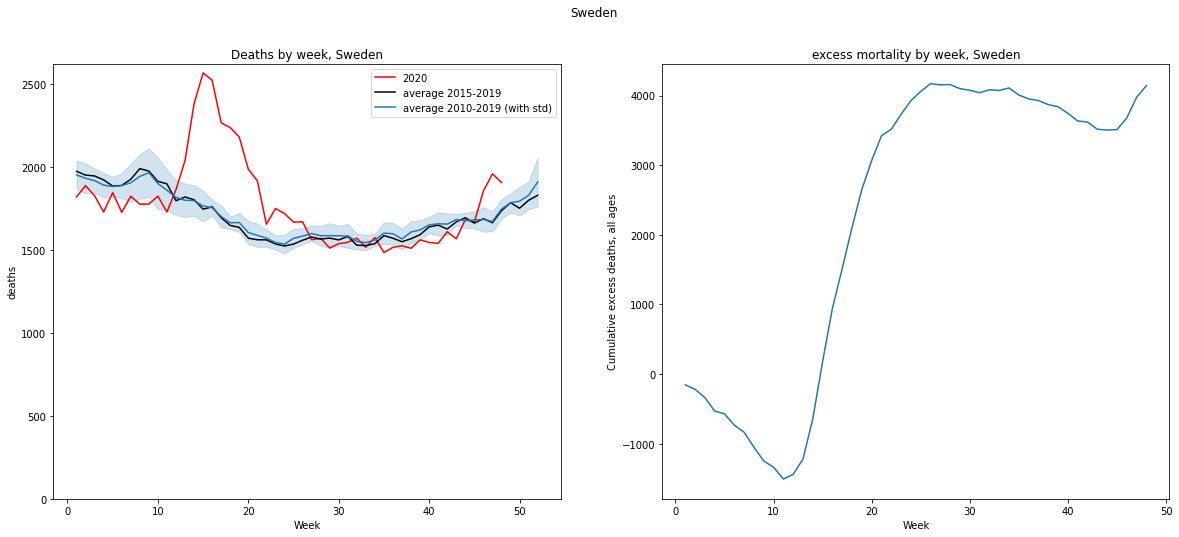

In [9]:
plot_and_report(df)

location,Norway
Weeks,47
deaths avg,"36,427.000000000015"
deaths 2020,"36,185.0"
delta,-242.00000000001455
comsum last,-242.0
excess,-0.006643423833969706
population,"5,421,242"
excess per population,-4.4639217360157424e-05
deaths avg per population,0.0067193089701585015


Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


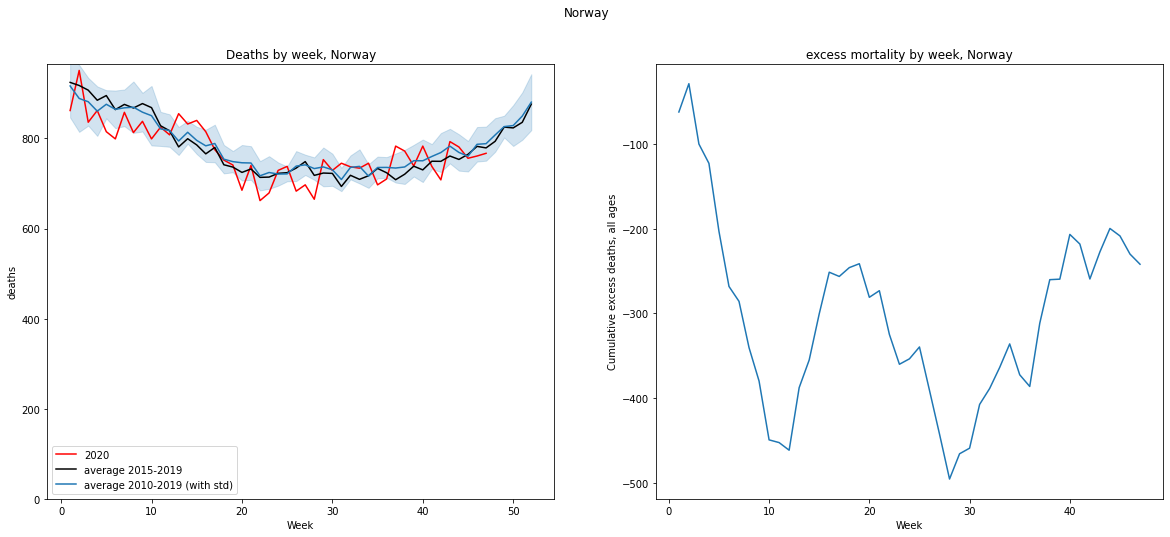

In [10]:
plot_and_report(df, country='Norway')

location,Finland
Weeks,47
deaths avg,"48,132.80000000001"
deaths 2020,"49,333.0"
delta,"1,200.1999999999898"
comsum last,"1,200.2"
excess,0.024935179337166952
population,"5,540,718"
excess per population,0.00021661452540988187
deaths avg per population,0.008687105173011874


Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


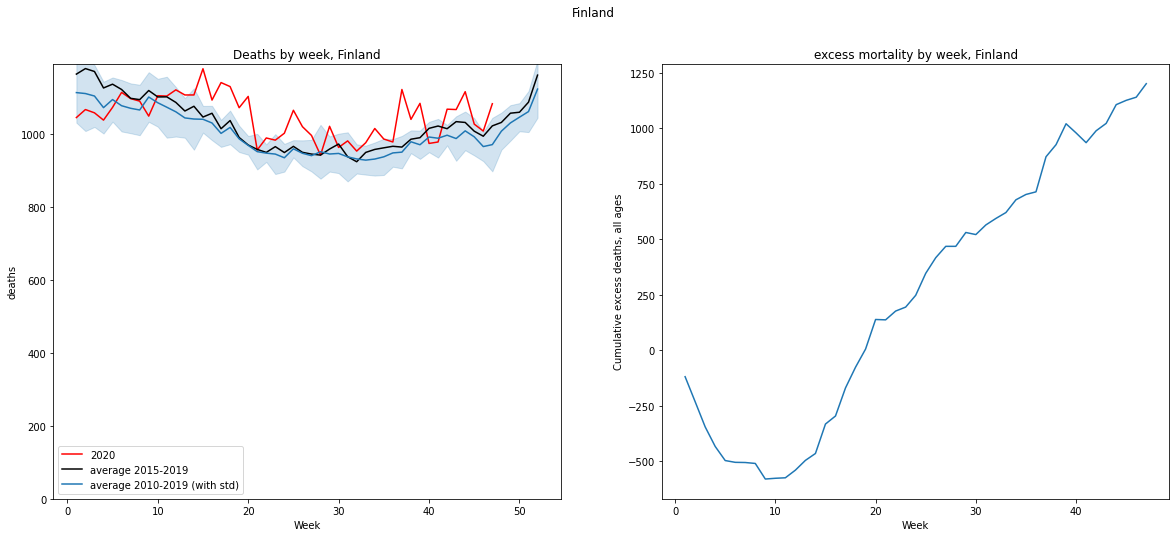

In [11]:
plot_and_report(df, country='Finland')

location,United States
Weeks,46
deaths avg,"2,446,576.0000000005"
deaths 2020,"2,836,704.0"
delta,"390,127.99999999953"
comsum last,"390,128.0"
excess,0.15945877013426088
population,"331,002,647"
excess per population,0.0011786250156482873
deaths avg per population,0.00739140916900281


Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


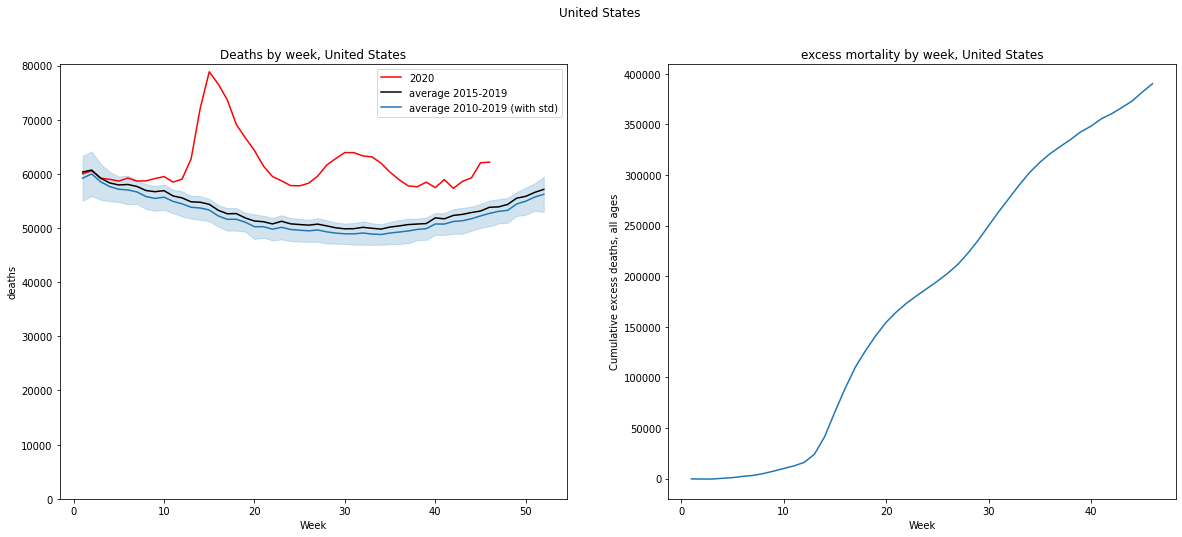

In [12]:
plot_and_report(df, country='United States')

location,Lithuania
Weeks,49
deaths avg,"37,673.6"
deaths 2020,"38,665.0"
delta,991.4000000000015
comsum last,991.4
excess,0.02631551006540393
population,"2,722,291"
excess per population,0.0003641785540193908
deaths avg per population,0.013838931987799981


Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


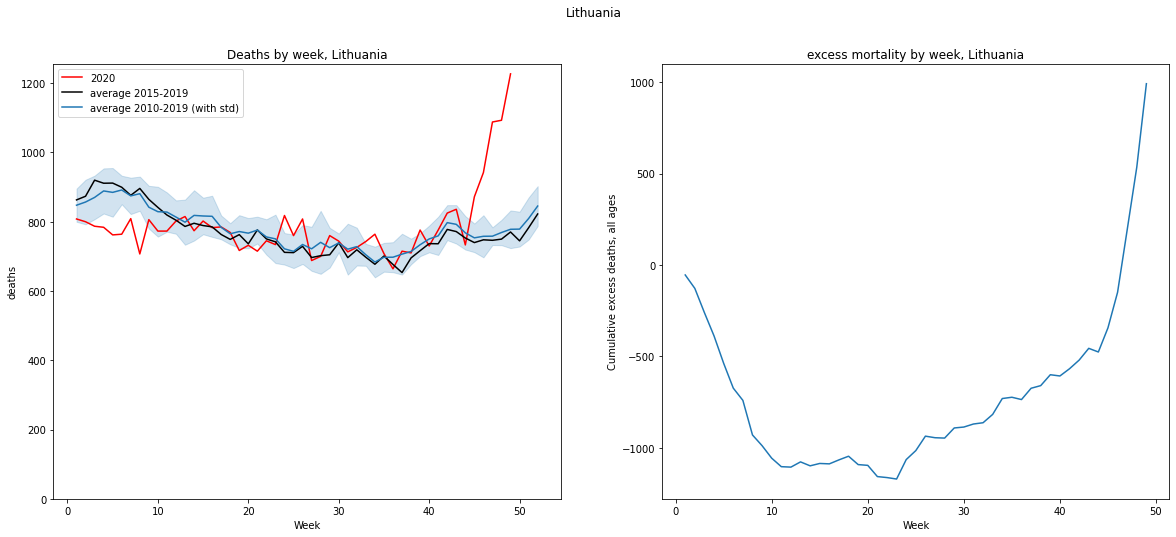

In [13]:
plot_and_report(df, 'Lithuania')

location,Latvia
Weeks,50
deaths avg,"27,200.2"
deaths 2020,"26,660.0"
delta,-540.2000000000007
comsum last,-540.2
excess,-0.019860148087146444
population,"1,886,202"
excess per population,-0.00028639562464677733
deaths avg per population,0.014420618788443655


Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


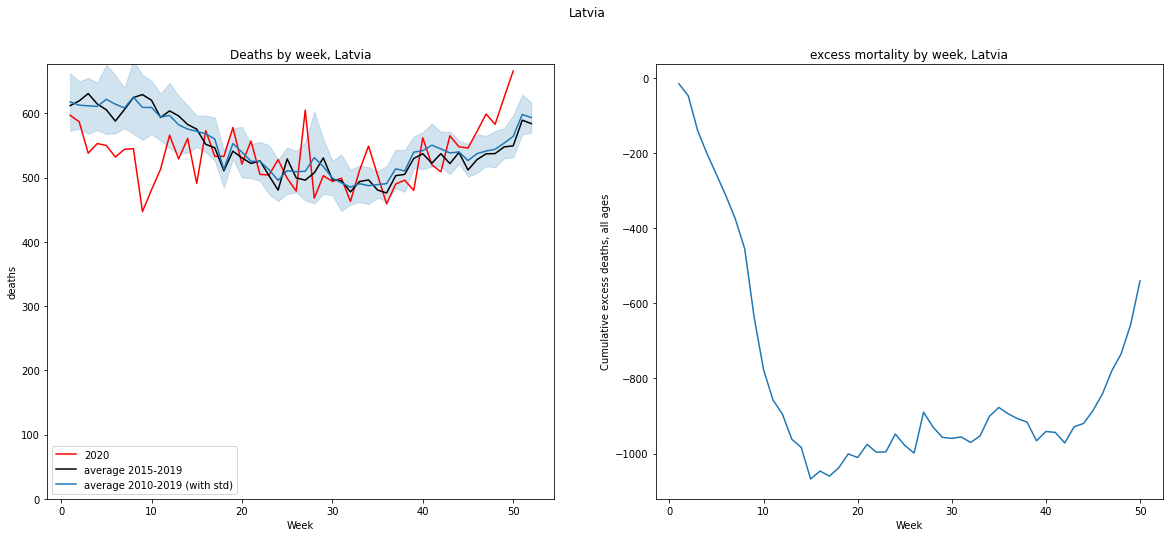

In [14]:
plot_and_report(df, 'Latvia')

In [15]:
if False:
    for country in df.location.unique():
        try:
            plot_and_report(df, country)
        except:
            print(country)

# Сравнение

In [16]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    df_compare = pd.DataFrame([report(df, country, display=False) for country in df.location.unique()])
df_compare.to_csv('report.csv', index=False)
df_compare = df_compare.dropna()
# df_compare = df_compare[df_compare.location.isin(selected)]
# df_compare

selected = ['United States', 'Finland', 'Sweden', 'Norway', 'Latvia', 'Lithuania', 'Spain', 'Germany', 'Estonia']

df_compare[df_compare.location.isin(selected)]

England & Wales Population data is not available
Northern Ireland Population data is not available
Scotland Population data is not available


,location,Weeks,deaths avg,deaths 2020,delta,comsum last,excess,population,excess per population,deaths avg per population
9,Estonia,50,14779.2,15100.0,320.8,320.8,0.021706,1326539.0,0.000242,0.011141
10,Finland,47,48132.8,49333.0,1200.2,1200.2,0.024935,5540718.0,0.000217,0.008687
12,Germany,47,838136.0,855309.0,17173.0,17173.0,0.020490,83783945.0,0.000205,0.010004
18,Latvia,50,27200.2,26660.0,-540.2,-540.2,-0.019860,1886202.0,-0.000286,0.014421
19,Lithuania,49,37673.6,38665.0,991.4,991.4,0.026316,2722291.0,0.000364,0.013839
24,Norway,47,36427.0,36185.0,-242.0,-242.0,-0.006643,5421242.0,-0.000045,0.006719
31,Spain,48,382508.8,453502.0,70993.2,70993.2,0.185599,46754783.0,0.001518,0.008181
32,Sweden,48,81423.4,85567.0,4143.6,4143.6,0.050890,10099270.0,0.000410,0.008062
36,United States,46,2446576.0,2836704.0,390128.0,390128.0,0.159459,331002647.0,0.001179,0.007391


In [17]:


def compare(data=df_compare, y='excess', select=selected, title=None):
    data=data[data.location.isin(select)]
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x="location", y=y, data=data, ax=ax)
    if title is None:
        title = y
    ax.set_title(title)
    #plt.close()
    fig.savefig(f'images/compare_{y}.png')
    pass

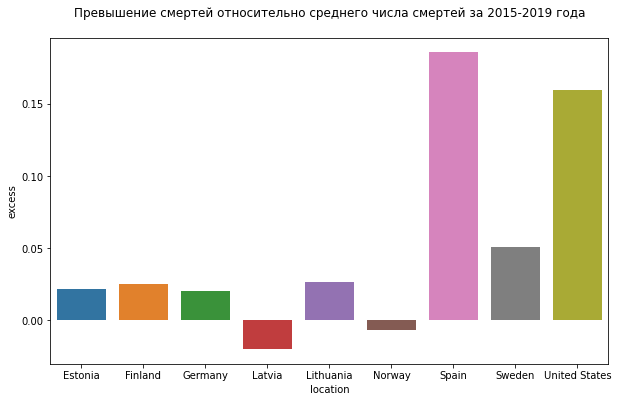

In [18]:
compare(data=df_compare, y='excess', select=selected, title='Превышение смертей относительно среднего числа смертей за 2015-2019 года\n')

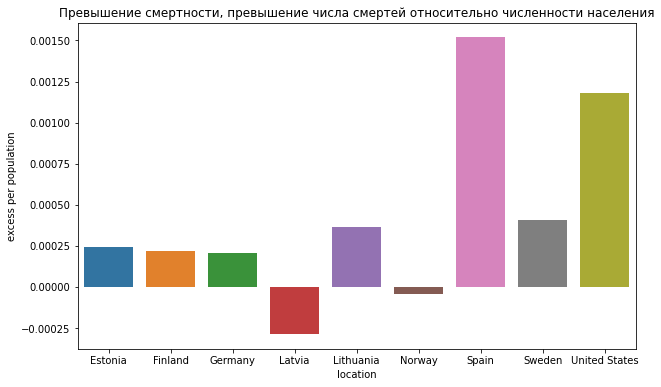

In [19]:
compare(data=df_compare, y='excess per population', select=selected, title='Превышение смертности, превышение числа смертей относительно численности населения')

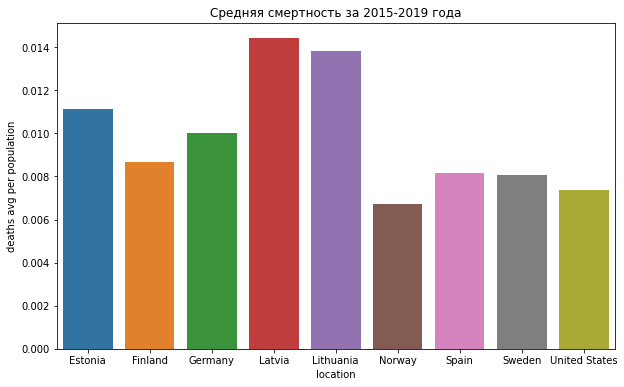

In [20]:
compare(data=df_compare, y='deaths avg per population', select=selected, title='Cредняя смертность за 2015-2019 года')

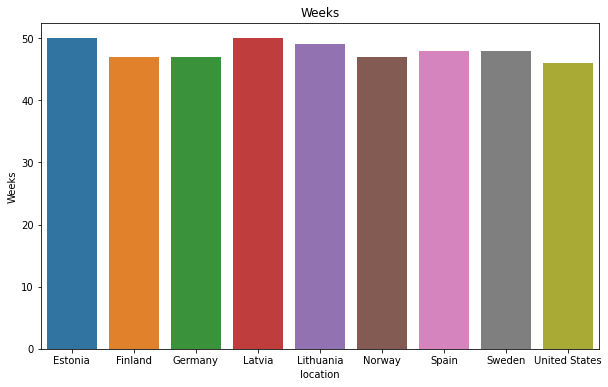

In [21]:
compare(data=df_compare, y='Weeks', select=selected)

# Обозначения

**Week** - количество недель за которые доступны данные

**excess** - превышение смертей относительно среднего числа смертей за 2015-2019 года, за доступное число недель

**excess per population** - превышение смертности, превышение числа смертей относительно численности населения, за доступное число недель

**deaths avg per population** - средняя смертность за 2015-2019 года, за доступное число недель



## Для ориентирования:

Допустим, средния продолжительность жизни 100 лет. И предположим в устойчивой популяции раждается столько же сколько умирает.
Тогда средняя смертность будет в среднем 1/100, умирает 10 человек на каждую 1000.
(В Литве  14 на тысячу, США 7 на тысячу)

Что означает прервышение смертности (относительно  среднего числа смертей за 2015-2019 года) на 0.15, (как в США без учета ноября и декабря)
Это значит, что вместо 10 человек в год на тысячу умерло на 15% больше, то есть 11,5.

То есть если судить лишь по своему окружению по знакомым то акое увеличение смертности можно и не заметить. Особенно детям. Взрослым будет заметней, в соответствии с возрастным [распределением](https://static.dw.com/image/52430882_7.png) летальности.
Например среди московской епархии за 2020 год умерло [почти в три раза больше](https://www.interfax.ru/russia/742777) чем в прошлом.

С другой стороны если в год в среднем умирало 2,5 миллиона человек, то увеличение смертности на 15% означает, что умерло на 375 тысяч больше.


Так же нужно учитывать, что данных по превышению смертности за последние несколько недель нету, они запаздывают.  
https://glav.su/files/messages/2020/12/17/5910800_162bb2d9e90cbe92a319fbf1ecfc019c.png  
https://glav.su/files/messages/2020/12/16/5910443_82b473598f3d40691d9f7015ce36f9f9.png  
Данные за январь-октябрь 2020 в основном за счет первой волны в марте-апреле, примерно два месяца.
А так как ноябрь-декабрь-январь-февраль будет нелегким, то можножно предположить (в зависимости от страны), что текущие оценки по превышению смертность к марту удвоятся или утроятся. За сезон 2020-03 - 2021-02.  
А старики умершие в 2020, врядли умрут в 2021, 2022, 2023...


Как видно, данные о смертности можно использовать в двух вариантах:

**"Ерунда, вместо 10 человек умерло всего лишь на 1,5 человека больше, обычный грипп"**

В этом варианте не учитывается
- запаздование данных о смертности
- перспектива второй волны
- в отсутвия принятых мер, смертность бы увеличилась в разы, с коллапсом медицины.

**"Вау, умерло на 375 тысяч больше"**
- на фоне 2,5 миллионов умирающих ежегодно пока немного. Особенно среди окружения детей, подростков, молодых.

Третий вариант, переболеем все за 12 месяцев без вакцины.
Если принять во внимание, что данные о летальности около 2-4%, а в Москве, например, [2,2% -4,4%](https://mosgorzdrav.ru/ru-RU/news/default/card/5028.html). Предположим, что за 12 месяцев переболеют 50%, тогда к фоновому уровню смертности 1 из 100 добавится еще 1-2 из 100, и превышение смертности достигнет 100-200%, в среднем за эти 12 месяцев.


Существенная циркуляция в обществе первого варианта приводит большим рискам, что получится третий. Насколько потеряет экономика судить не берусь.
А если поинмать опасность и не пренебрегать ею, то возможно удастся не доводить до существенных потерь. А при быстрой ликвидации выспышки, и как следствие снятия мер, экономика начала бы уже востанавливаться.


# Source of data: Our World in Data

Как сказать "Спасибо"  
https://ourworldindata.org/donate

